In [2]:
cd drive/MyDrive/ML_Assignment/Lab\ Evaluation

/content/drive/MyDrive/ML_Assignment/Lab Evaluation


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
!pip install scikit-plot

# **QUESTION 1**

For wine dataset SVM & Random Forest

SVC Linear:
Confusion Matrix
[[15  0  0]
 [ 1 19  0]
 [ 0  0 19]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        19

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

-----------------------------------
-----------------------------------
Accuracy Score:
0.9814814814814815


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Random Forest:
Confusion Matrix
[[15  0  0]
 [ 0 20  0]
 [ 0  0 19]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        19

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

-----------------------------------
-----------------------------------
Accuracy Score:
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


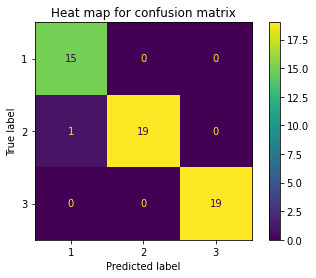

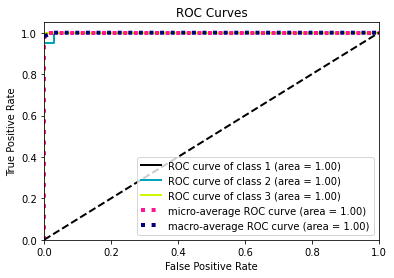

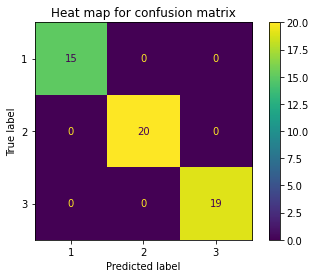

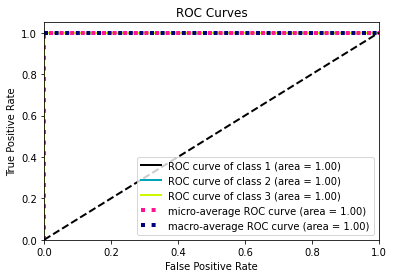

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size,random_state=27)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t,y_p):

    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Preformance Evaluation:')
    print(classification_report(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Accuracy Score:')
    print(accuracy_score(y_t,y_p))

    plot_confusion_matrix(classi,X_t,y_t)
    plt.title('Heat map for confusion matrix')
    plt.show()

    y_p_proba = classi.predict_proba(X_t)

    skplt.metrics.plot_roc(y_t,y_p_proba)
    plt.show()

def tester(classi,X_t,y_t,y_p,fname):
  from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
  print("Confusion Matrix")
  print(confusion_matrix(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Preformance Evaluation:')
  print(classification_report(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Accuracy Score:')
  print(accuracy_score(y_t,y_p))
  
  plot_confusion_matrix(classi,X_t,y_t)
  plt.title('Heat map for confusion matrix')
  # plt.show()
  plt.savefig(fname+"cf")
  
  y_p_proba = classi.predict_proba(X_t)
  skplt.metrics.plot_roc(y_t,y_p_proba)
  # plt.show()
  plt.savefig(fname+"roc")

df1 = pd.read_csv('data/wine.data', header=None)
X = df1.iloc[:,1:]
y = df1.iloc[:,0]
# print (X)
# print (y)

X_train,X_test,y_train,y_test = preprocess(X,y,scale=True,pca=False)

from sklearn.svm import SVC
classifier1 = SVC(kernel='linear', probability=True)
classifier1.fit(X_train,y_train)

y_pred = classifier1.predict(X_test)

print('SVC Linear:')
fname = f"/content/drive/MyDrive/ML_Assignment/Lab_Evaluation/svm"
tester(classifier1,X_test,y_test,y_pred,fname)

from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier()
classifier3.fit(X_train,y_train)

y_pred = classifier3.predict(X_test)

print('Random Forest:')
fname = f"/content/drive/MyDrive/ML_Assignment/Lab_Evaluation/rf"
tester(classifier3,X_test,y_test,y_pred,fname)

For ionosphere dataset SVM & Random Forest

SVC Linear:
Confusion Matrix
[[24 11]
 [ 5 66]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           b       0.83      0.69      0.75        35
           g       0.86      0.93      0.89        71

    accuracy                           0.85       106
   macro avg       0.84      0.81      0.82       106
weighted avg       0.85      0.85      0.85       106

-----------------------------------
-----------------------------------
Accuracy Score:
0.8490566037735849


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Random Forest:
Confusion Matrix
[[30  5]
 [ 0 71]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           b       1.00      0.86      0.92        35
           g       0.93      1.00      0.97        71

    accuracy                           0.95       106
   macro avg       0.97      0.93      0.94       106
weighted avg       0.96      0.95      0.95       106

-----------------------------------
-----------------------------------
Accuracy Score:
0.9528301886792453


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


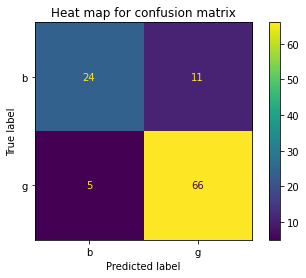

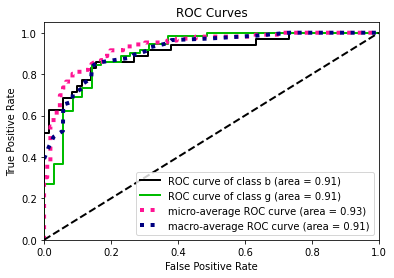

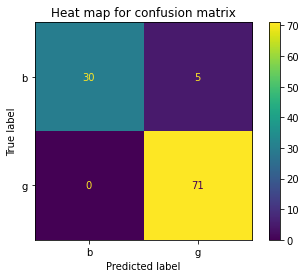

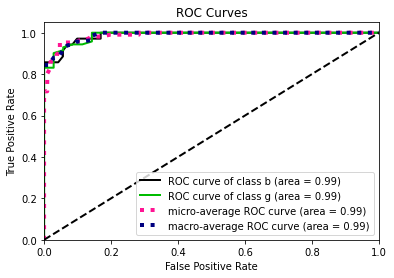

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size,random_state=5)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t,y_p):

    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Preformance Evaluation:')
    print(classification_report(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Accuracy Score:')
    print(accuracy_score(y_t,y_p))

    plot_confusion_matrix(classi,X_t,y_t)
    plt.title('Heat map for confusion matrix')
    plt.show()

    y_p_proba = classi.predict_proba(X_t)

    skplt.metrics.plot_roc(y_t,y_p_proba)
    plt.show()

def tester(classi,X_t,y_t,y_p,fname):
  from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
  print("Confusion Matrix")
  print(confusion_matrix(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Preformance Evaluation:')
  print(classification_report(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Accuracy Score:')
  print(accuracy_score(y_t,y_p))
  
  plot_confusion_matrix(classi,X_t,y_t)
  plt.title('Heat map for confusion matrix')
  # plt.show()
  plt.savefig(fname+"cf")
  
  y_p_proba = classi.predict_proba(X_t)
  skplt.metrics.plot_roc(y_t,y_p_proba)
  # plt.show()
  plt.savefig(fname+"roc")

df1 = pd.read_csv('data/ionos.data', header=None)
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
# print (X)
# print (y)

X_train,X_test,y_train,y_test = preprocess(X,y,scale=False,pca=False)

from sklearn.svm import SVC
classifier1 = SVC(kernel='linear', probability=True)
classifier1.fit(X_train,y_train)

y_pred = classifier1.predict(X_test)

print('SVC Linear:')
fname = f"/content/drive/MyDrive/ML_Assignment/Lab_Evaluation/Question1/svm_iono"
tester(classifier1,X_test,y_test,y_pred,fname)

from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier()
classifier3.fit(X_train,y_train)

y_pred = classifier3.predict(X_test)

print('Random Forest:')
fname = f"/content/drive/MyDrive/ML_Assignment/Lab_Evaluation/Question1/rf_iono"
tester(classifier3,X_test,y_test,y_pred,fname)

Naive Bayes Multinomial

Multinomial Naive Bayes:
Confusion Matrix
[[17  2  4]
 [ 2 14  2]
 [ 0  2 11]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           1       0.89      0.74      0.81        23
           2       0.78      0.78      0.78        18
           3       0.65      0.85      0.73        13

    accuracy                           0.78        54
   macro avg       0.77      0.79      0.77        54
weighted avg       0.80      0.78      0.78        54

-----------------------------------
-----------------------------------
Accuracy Score:
0.7777777777777778


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


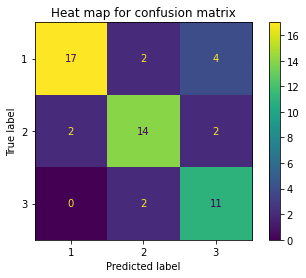

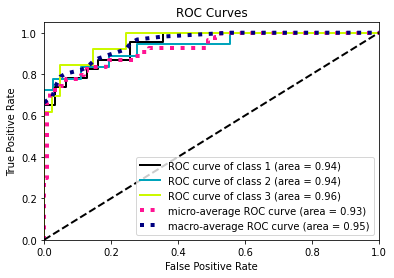

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size,random_state=5)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t,y_p,fname):
  from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
  print("Confusion Matrix")
  print(confusion_matrix(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Preformance Evaluation:')
  print(classification_report(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Accuracy Score:')
  print(accuracy_score(y_t,y_p))
  
  plot_confusion_matrix(classi,X_t,y_t)
  plt.title('Heat map for confusion matrix')
  # plt.show()
  plt.savefig(fname+"cf")
  
  y_p_proba = classi.predict_proba(X_t)
  skplt.metrics.plot_roc(y_t,y_p_proba)
  # plt.show()
  plt.savefig(fname+"roc")

df1 = pd.read_csv('data/wine.data', header=None)
X = df1.iloc[:,1:]
y = df1.iloc[:,0]
# print (X)
# print (y)

X_train,X_test,y_train,y_test = preprocess(X,y,scale=False,pca=False)

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)

y_pred_MNB = MultiNB.predict(X_test)
print('Multinomial Naive Bayes:')
fname = f"/content/drive/MyDrive/ML_Assignment/Lab_Evaluation/Question1/multi_naive"
tester(MultiNB,X_test,y_test,y_pred_MNB,fname)

Naive Bayes Bernoulli

Bernoli Naive Bayes:
Confusion Matrix
[[ 0 23  0]
 [ 0 18  0]
 [ 0 13  0]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.33      1.00      0.50        18
           3       0.00      0.00      0.00        13

    accuracy                           0.33        54
   macro avg       0.11      0.33      0.17        54
weighted avg       0.11      0.33      0.17        54

-----------------------------------
-----------------------------------
Accuracy Score:
0.3333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py

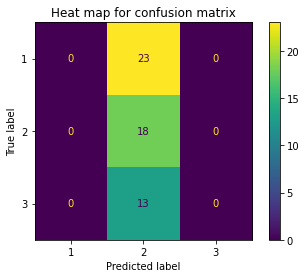

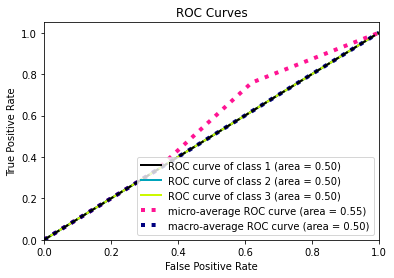

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size,random_state=5)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t,y_p,fname):
  from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
  print("Confusion Matrix")
  print(confusion_matrix(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Preformance Evaluation:')
  print(classification_report(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Accuracy Score:')
  print(accuracy_score(y_t,y_p))
  
  plot_confusion_matrix(classi,X_t,y_t)
  plt.title('Heat map for confusion matrix')
  # plt.show()
  plt.savefig(fname+"cf")
  
  y_p_proba = classi.predict_proba(X_t)
  skplt.metrics.plot_roc(y_t,y_p_proba)
  # plt.show()
  plt.savefig(fname+"roc")

df1 = pd.read_csv('data/wine.data', header=None)
X = df1.iloc[:,1:]
y = df1.iloc[:,0]
# print (X)
# print (y)

X_train,X_test,y_train,y_test = preprocess(X,y,scale=False,pca=False)

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)

y_pred_BNB = BernNB.predict(X_test)
print('Bernoli Naive Bayes:')
fname = f"/content/drive/MyDrive/ML_Assignment/Lab_Evaluation/Question1/bern_naive"
tester(BernNB,X_test,y_test,y_pred_BNB,fname)


Naive Bayes Gaussian

Gaussian Naive Bayes:
Confusion Matrix
[[20  3  0]
 [ 0 18  0]
 [ 0  0 13]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           1       1.00      0.87      0.93        23
           2       0.86      1.00      0.92        18
           3       1.00      1.00      1.00        13

    accuracy                           0.94        54
   macro avg       0.95      0.96      0.95        54
weighted avg       0.95      0.94      0.94        54

-----------------------------------
-----------------------------------
Accuracy Score:
0.9444444444444444


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


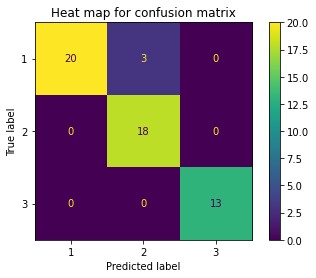

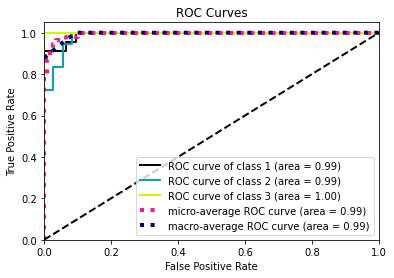

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size,random_state=5)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t,y_p,fname):
  from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
  print("Confusion Matrix")
  print(confusion_matrix(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Preformance Evaluation:')
  print(classification_report(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Accuracy Score:')
  print(accuracy_score(y_t,y_p))
  
  plot_confusion_matrix(classi,X_t,y_t)
  plt.title('Heat map for confusion matrix')
  # plt.show()
  plt.savefig(fname+"cf")
  
  y_p_proba = classi.predict_proba(X_t)
  skplt.metrics.plot_roc(y_t,y_p_proba)
  # plt.show()
  plt.savefig(fname+"roc")

df1 = pd.read_csv('data/wine.data', header=None)
X = df1.iloc[:,1:]
y = df1.iloc[:,0]
# print (X)
# print (y)

X_train,X_test,y_train,y_test = preprocess(X,y,scale=False,pca=False)

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

GaussNB = GaussianNB()
GaussNB.fit(X_train, y_train)

y_pred_GNB = GaussNB.predict(X_test)
print('Gaussian Naive Bayes:')
fname = f"/content/drive/MyDrive/ML_Assignment/Lab_Evaluation/Question1/gauss_naive"
tester(GaussNB,X_test,y_test,y_pred_GNB,fname)


For IONOSPHERE dataset Naive Bayes Multinomial

Multinomial Naive Bayes:
Confusion Matrix
[[ 9 26]
 [ 3 68]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           b       0.75      0.26      0.38        35
           g       0.72      0.96      0.82        71

    accuracy                           0.73       106
   macro avg       0.74      0.61      0.60       106
weighted avg       0.73      0.73      0.68       106

-----------------------------------
-----------------------------------
Accuracy Score:
0.7264150943396226


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


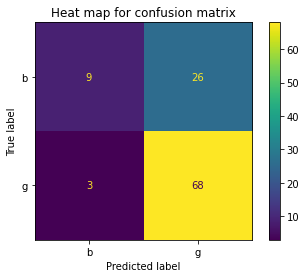

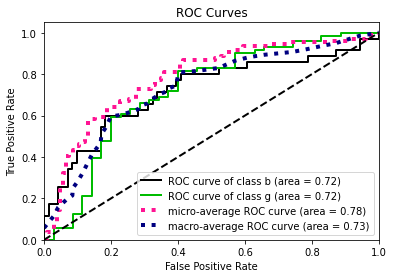

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size,random_state=5)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t,y_p,fname):
  from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
  print("Confusion Matrix")
  print(confusion_matrix(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Preformance Evaluation:')
  print(classification_report(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Accuracy Score:')
  print(accuracy_score(y_t,y_p))
  
  plot_confusion_matrix(classi,X_t,y_t)
  plt.title('Heat map for confusion matrix')
  # plt.show()
  plt.savefig(fname+"cf")
  
  y_p_proba = classi.predict_proba(X_t)
  skplt.metrics.plot_roc(y_t,y_p_proba)
  # plt.show()
  plt.savefig(fname+"roc")

df1 = pd.read_csv('data/ionos.data', header=None)
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
# print (X)
# print (y)

X_train,X_test,y_train,y_test = preprocess(X+1,y,scale=False,pca=False)

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)

y_pred_MNB = MultiNB.predict(X_test)
print('Multinomial Naive Bayes:')
fname = f"/content/drive/MyDrive/ML_Assignment/Lab_Evaluation/Question1/multi_naive_ionos"
tester(MultiNB,X_test,y_test,y_pred_MNB,fname)

For IONOSPHERE dataset Naive Bayes Bernoulli

Bernoulli Naive Bayes:
Confusion Matrix
[[26  9]
 [ 5 66]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           b       0.84      0.74      0.79        35
           g       0.88      0.93      0.90        71

    accuracy                           0.87       106
   macro avg       0.86      0.84      0.85       106
weighted avg       0.87      0.87      0.87       106

-----------------------------------
-----------------------------------
Accuracy Score:
0.8679245283018868


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


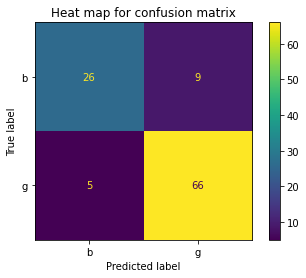

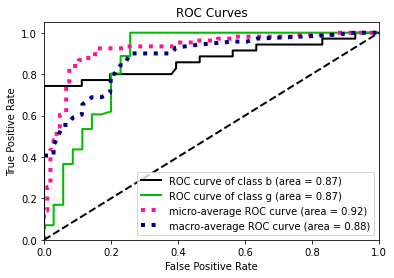

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size,random_state=5)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t,y_p,fname):
  from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
  print("Confusion Matrix")
  print(confusion_matrix(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Preformance Evaluation:')
  print(classification_report(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Accuracy Score:')
  print(accuracy_score(y_t,y_p))
  
  plot_confusion_matrix(classi,X_t,y_t)
  plt.title('Heat map for confusion matrix')
  # plt.show()
  plt.savefig(fname+"cf")
  
  y_p_proba = classi.predict_proba(X_t)
  skplt.metrics.plot_roc(y_t,y_p_proba)
  # plt.show()
  plt.savefig(fname+"roc")

df1 = pd.read_csv('data/ionos.data', header=None)
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
# print (X)
# print (y)

X_train,X_test,y_train,y_test = preprocess(X,y,scale=False,pca=False)

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)

y_pred_BNB = BernNB.predict(X_test)
print('Bernoulli Naive Bayes:')
fname = f"/content/drive/MyDrive/ML_Assignment/Lab_Evaluation/Question1/bern_naive_ionos"
tester(BernNB,X_test,y_test,y_pred_BNB,fname)

For IONOSPHERE dataset Naive Bayes Gaussian

Gaussian Naive Bayes:
Confusion Matrix
[[26  9]
 [ 1 70]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           b       0.96      0.74      0.84        35
           g       0.89      0.99      0.93        71

    accuracy                           0.91       106
   macro avg       0.92      0.86      0.89       106
weighted avg       0.91      0.91      0.90       106

-----------------------------------
-----------------------------------
Accuracy Score:
0.9056603773584906


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


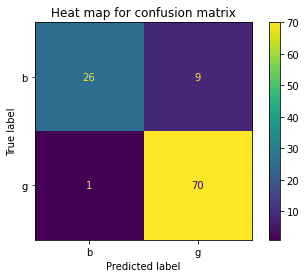

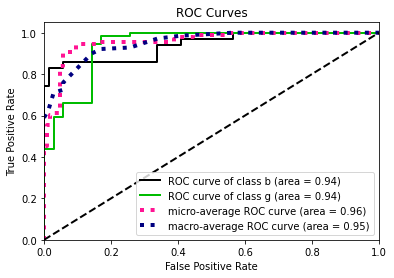

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size,random_state=5)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t,y_p,fname):
  from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
  print("Confusion Matrix")
  print(confusion_matrix(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Preformance Evaluation:')
  print(classification_report(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Accuracy Score:')
  print(accuracy_score(y_t,y_p))
  
  plot_confusion_matrix(classi,X_t,y_t)
  plt.title('Heat map for confusion matrix')
  # plt.show()
  plt.savefig(fname+"cf")
  
  y_p_proba = classi.predict_proba(X_t)
  skplt.metrics.plot_roc(y_t,y_p_proba)
  # plt.show()
  plt.savefig(fname+"roc")

df1 = pd.read_csv('data/ionos.data', header=None)
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
# print (X)
# print (y)

X_train,X_test,y_train,y_test = preprocess(X,y,scale=False,pca=False)

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

GaussNB = GaussianNB()
GaussNB.fit(X_train, y_train)

y_pred_GNB = GaussNB.predict(X_test)
print('Gaussian Naive Bayes:')
fname = f"/content/drive/MyDrive/ML_Assignment/Lab_Evaluation/Question1/gauss_naive_ionos"
tester(GaussNB,X_test,y_test,y_pred_GNB,fname)

For WINE dataset Decision Tree Classifier

Decision Tree Classifier:
Confusion Matrix
[[21  2  0]
 [ 1 16  1]
 [ 0  0 13]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           1       0.95      0.91      0.93        23
           2       0.89      0.89      0.89        18
           3       0.93      1.00      0.96        13

    accuracy                           0.93        54
   macro avg       0.92      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54

-----------------------------------
-----------------------------------
Accuracy Score:
0.9259259259259259


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


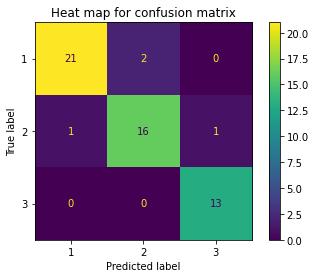

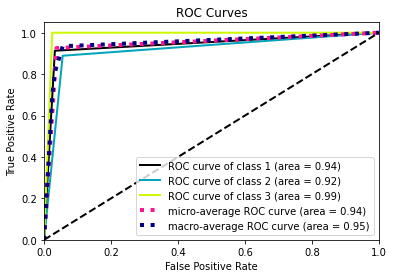

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size,random_state=5)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t,y_p,fname):
  from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
  print("Confusion Matrix")
  print(confusion_matrix(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Preformance Evaluation:')
  print(classification_report(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Accuracy Score:')
  print(accuracy_score(y_t,y_p))
  
  plot_confusion_matrix(classi,X_t,y_t)
  plt.title('Heat map for confusion matrix')
  # plt.show()
  plt.savefig(fname+"cf")
  
  y_p_proba = classi.predict_proba(X_t)
  skplt.metrics.plot_roc(y_t,y_p_proba)
  # plt.show()
  plt.savefig(fname+"roc")

df1 = pd.read_csv('data/wine.data', header=None)
X = df1.iloc[:,1:]
y = df1.iloc[:,0]
# X = df1.iloc[:,:-1]
# y = df1.iloc[:,-1]
# print (X)
# print (y)

X_train,X_test,y_train,y_test = preprocess(X,y,scale=False,pca=False)

from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier()
dTree.fit(X_train, y_train)

y_pred = dTree.predict(X_test)
print('Decision Tree Classifier:')
fname = f"/content/drive/MyDrive/ML_Assignment/Lab_Evaluation/Question1/dTree"
tester(dTree,X_test,y_test,y_pred,fname)


For IONOSPHERE dataset Decision Tree Classifier

Decision Tree Classifier:
Confusion Matrix
[[27  8]
 [ 4 67]]
-----------------------------------
-----------------------------------
Preformance Evaluation:
              precision    recall  f1-score   support

           b       0.87      0.77      0.82        35
           g       0.89      0.94      0.92        71

    accuracy                           0.89       106
   macro avg       0.88      0.86      0.87       106
weighted avg       0.89      0.89      0.88       106

-----------------------------------
-----------------------------------
Accuracy Score:
0.8867924528301887


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


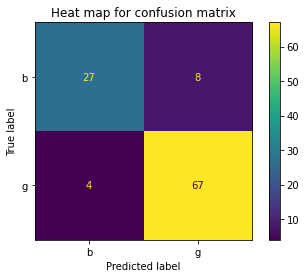

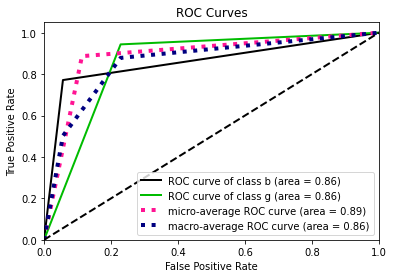

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size,random_state=5)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t,y_p,fname):
  from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
  print("Confusion Matrix")
  print(confusion_matrix(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Preformance Evaluation:')
  print(classification_report(y_t,y_p))
  
  print('-----------------------------------')
  print('-----------------------------------')
  
  print('Accuracy Score:')
  print(accuracy_score(y_t,y_p))
  
  plot_confusion_matrix(classi,X_t,y_t)
  plt.title('Heat map for confusion matrix')
  # plt.show()
  plt.savefig(fname+"cf")
  
  y_p_proba = classi.predict_proba(X_t)
  skplt.metrics.plot_roc(y_t,y_p_proba)
  # plt.show()
  plt.savefig(fname+"roc")

df1 = pd.read_csv('data/ionos.data', header=None)
# X = df1.iloc[:,1:]
# y = df1.iloc[:,0]
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
# print (X)
# print (y)

X_train,X_test,y_train,y_test = preprocess(X,y,scale=False,pca=False)

from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier()
dTree.fit(X_train, y_train)

y_pred = dTree.predict(X_test)
print('Decision Tree Classifier:')
fname = f"/content/drive/MyDrive/ML_Assignment/Lab_Evaluation/Question1/dTree_ionos"
tester(dTree,X_test,y_test,y_pred,fname)


# **QUESTION 5**

K-Means

In [34]:
import numpy as np
import pandas as pd

def preprocess_cluster(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X = sc.fit_transform(X)
        X = sc.transform(X)
        # X = pd.DataFrame(X)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X = pca.fit_transform(X)
        X = pca.transform(X)
   
    return X, y

def tester_cluster(X,y,model):

    from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

    print("Performance Evaluation:")
    print('-----------------------------------')
    print('-----------------------------------')

    print("Silhouette Coefficient")
    print(silhouette_score(X,model.labels_, metric='euclidean'))

    print('-----------------------------------')

    print("Calinski Harabasz Score")
    print(calinski_harabasz_score(X,model.labels_))
   
    print('-----------------------------------')

    print("Davies Bouldin Score")
    print(davies_bouldin_score(X,model.labels_))

    print('-----------------------------------')

df1 = pd.read_csv('data/wine.data', header=None)
X = np.array(df1.iloc[:,1:])
y = np.array(df1.iloc[:,0])

X, y = preprocess_cluster(X,y,te_size=0,label=True,scale=False)

from sklearn.cluster import KMeans
classifier = KMeans(n_clusters=3,init='random',n_init=100,max_iter=1000)

claasifier.fit(X)

tester_cluster(X,y,classifier)


Performance Evaluation:
-----------------------------------
-----------------------------------
Silhouette Coefficient
0.571138193786884
-----------------------------------
Calinski Harabasz Score
561.815657860671
-----------------------------------
Davies Bouldin Score
0.5342431775436273
-----------------------------------


In [36]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7 MB 29.7 MB/s 


KMedoids

In [37]:
import numpy as np
import pandas as pd

def preprocess_cluster(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X = sc.fit_transform(X)
        X = sc.transform(X)
        # X = pd.DataFrame(X)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X = pca.fit_transform(X)
        X = pca.transform(X)
   
    return X, y

def tester_cluster(X,y,model):

    from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

    print("Performance Evaluation:")
    print('-----------------------------------')
    print('-----------------------------------')

    print("Silhouette Coefficient")
    print(silhouette_score(X,model.labels_, metric='euclidean'))

    print('-----------------------------------')

    print("Calinski Harabasz Score")
    print(calinski_harabasz_score(X,model.labels_))
   
    print('-----------------------------------')

    print("Davies Bouldin Score")
    print(davies_bouldin_score(X,model.labels_))

    print('-----------------------------------')

df1 = pd.read_csv('data/wine.data', header=None)
X = np.array(df1.iloc[:,1:])
y = np.array(df1.iloc[:,0])

X, y = preprocess_cluster(X,y,te_size=0,label=True,scale=False)

from sklearn_extra.cluster import KMedoids
classifier = KMedoids(n_clusters=3,method='pam',init='k-medoids++',max_iter=1000)
classifier.fit(X)
tester_cluster(X,y,classifier)

Performance Evaluation:
-----------------------------------
-----------------------------------
Silhouette Coefficient
0.5708303868116225
-----------------------------------
Calinski Harabasz Score
556.1459974410649
-----------------------------------
Davies Bouldin Score
0.5316801818576816
-----------------------------------


DBSCAN

In [38]:
import numpy as np
import pandas as pd

def preprocess_cluster(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X = sc.fit_transform(X)
        X = sc.transform(X)
        # X = pd.DataFrame(X)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X = pca.fit_transform(X)
        X = pca.transform(X)
   
    return X, y

def tester_cluster(X,y,model):

    from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

    print("Performance Evaluation:")
    print('-----------------------------------')
    print('-----------------------------------')

    print("Silhouette Coefficient")
    print(silhouette_score(X,model.labels_, metric='euclidean'))

    print('-----------------------------------')

    print("Calinski Harabasz Score")
    print(calinski_harabasz_score(X,model.labels_))
   
    print('-----------------------------------')

    print("Davies Bouldin Score")
    print(davies_bouldin_score(X,model.labels_))

    print('-----------------------------------')

df1 = pd.read_csv('data/wine.data', header=None)
X = np.array(df1.iloc[:,1:])
y = np.array(df1.iloc[:,0])

X, y = preprocess_cluster(X,y,te_size=0,label=True,scale=False)

from sklearn.cluster import DBSCAN
classifier = DBSCAN(eps=60,min_samples=5)
classifier.fit(X)
tester_cluster(X,y,classifier)

Performance Evaluation:
-----------------------------------
-----------------------------------
Silhouette Coefficient
0.5131593970763382
-----------------------------------
Calinski Harabasz Score
55.59856582586847
-----------------------------------
Davies Bouldin Score
0.37396418544796095
-----------------------------------


OPTICS

In [39]:
import numpy as np
import pandas as pd

def preprocess_cluster(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X = sc.fit_transform(X)
        X = sc.transform(X)
        # X = pd.DataFrame(X)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X = pca.fit_transform(X)
        X = pca.transform(X)
   
    return X, y

def tester_cluster(X,y,model):

    from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

    print("Performance Evaluation:")
    print('-----------------------------------')
    print('-----------------------------------')

    print("Silhouette Coefficient")
    print(silhouette_score(X,model.labels_, metric='euclidean'))

    print('-----------------------------------')

    print("Calinski Harabasz Score")
    print(calinski_harabasz_score(X,model.labels_))
   
    print('-----------------------------------')

    print("Davies Bouldin Score")
    print(davies_bouldin_score(X,model.labels_))

    print('-----------------------------------')

df1 = pd.read_csv('data/wine.data', header=None)
X = np.array(df1.iloc[:,1:])
y = np.array(df1.iloc[:,0])

X, y = preprocess_cluster(X,y,te_size=0,label=True,scale=False)

from sklearn.cluster import OPTICS
classifier = OPTICS(max_eps=50,min_samples=7)
classifier.fit(X)
tester_cluster(X,y,classifier)

Performance Evaluation:
-----------------------------------
-----------------------------------
Silhouette Coefficient
0.2654566747731084
-----------------------------------
Calinski Harabasz Score
28.198952246515542
-----------------------------------
Davies Bouldin Score
5.752797762329204
-----------------------------------


# **QUESTION 3**

In [42]:
!pip install hmmlearn

     |████████████████████████████████| 374 kB 27.8 MB/s 


**IRIS DATASET**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t):

    y_p = classi.predict(X_t)

    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Performance Evaluation:')
    print(classification_report(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Accuracy Score:')
    print(accuracy_score(y_t,y_p))

df1 = pd.read_csv('data/iris.data', header=None)
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

X_train,X_test,y_train,y_test = preprocess(X,y,0.3,label=True,scale=True)

from hmmlearn import hmm

model = hmm.GaussianHMM(n_components=2,n_iter=1000)
model.fit(X_train)
tester(model,X_test,y_test)

Confusion Matrix
[[13  1  0]
 [ 0 18  0]
 [ 0 13  0]]
-----------------------------------
-----------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.56      1.00      0.72        18
           2       0.00      0.00      0.00        13

    accuracy                           0.69        45
   macro avg       0.52      0.64      0.56        45
weighted avg       0.54      0.69      0.59        45

-----------------------------------
-----------------------------------
Accuracy Score:
0.6888888888888889


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t):

    y_p = classi.predict(X_t)

    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Performance Evaluation:')
    print(classification_report(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Accuracy Score:')
    print(accuracy_score(y_t,y_p))

df1 = pd.read_csv('data/iris.data', header=None)
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

X_train,X_test,y_train,y_test = preprocess(X,y,0.3,label=True,scale=True)

from hmmlearn import hmm

model = hmm.GMMHMM(n_components=2,n_iter=1000)
model.fit(X_train)
tester(model,X_test,y_test)

Confusion Matrix
[[18  1  0]
 [ 0 15  0]
 [ 0 11  0]]
-----------------------------------
-----------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.56      1.00      0.71        15
           2       0.00      0.00      0.00        11

    accuracy                           0.73        45
   macro avg       0.52      0.65      0.56        45
weighted avg       0.61      0.73      0.65        45

-----------------------------------
-----------------------------------
Accuracy Score:
0.7333333333333333


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**IONOSPHERE DATASET**

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t):

    y_p = classi.predict(X_t)

    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Performance Evaluation:')
    print(classification_report(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Accuracy Score:')
    print(accuracy_score(y_t,y_p))

df1 = pd.read_csv('data/ionos.data', header=None)
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

X_train,X_test,y_train,y_test = preprocess(X,y,0.3,label=True,scale=True)

from hmmlearn import hmm

classifier = hmm.GaussianHMM(n_components=2,n_iter=1000)
classifier.fit(X_train)
tester(classifier,X_test,y_test)

Confusion Matrix
[[29  4]
 [23 50]]
-----------------------------------
-----------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.56      0.88      0.68        33
           1       0.93      0.68      0.79        73

    accuracy                           0.75       106
   macro avg       0.74      0.78      0.73       106
weighted avg       0.81      0.75      0.75       106

-----------------------------------
-----------------------------------
Accuracy Score:
0.7452830188679245


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t):

    y_p = classi.predict(X_t)

    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Performance Evaluation:')
    print(classification_report(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Accuracy Score:')
    print(accuracy_score(y_t,y_p))

# df1 = pd.read_csv('data/iris.data', header=None)
# X = df1.iloc[:,:-1]
# y = df1.iloc[:,-1]

# df1 = pd.read_csv('data/diabetes.csv')
# X = df1.iloc[:,df1.columns!=1]
# y = df1.iloc[:,1]

df1 = pd.read_csv('data/ionos.data', header=None)
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

X_train,X_test,y_train,y_test = preprocess(X,y,0.3,label=True,scale=True)

from hmmlearn import hmm
classifier = hmm.GMMHMM(n_components=2,n_iter=1000)
classifier.fit(X_train)
tester(classifier,X_test,y_test)

Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'
Even though the 'means_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'm'
Even though the 'covars_' attribute is set, it will be overwritten during initialization because 'init_params' contains 'c'


Confusion Matrix
[[34  4]
 [24 44]]
-----------------------------------
-----------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.59      0.89      0.71        38
           1       0.92      0.65      0.76        68

    accuracy                           0.74       106
   macro avg       0.75      0.77      0.73       106
weighted avg       0.80      0.74      0.74       106

-----------------------------------
-----------------------------------
Accuracy Score:
0.7358490566037735


**DIABETES DATASET**

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.datasets import load_diabetes

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t):

    y_p = classi.predict(X_t)

    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Performance Evaluation:')
    print(classification_report(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Accuracy Score:')
    print(accuracy_score(y_t,y_p))

dataset = load_diabetes()
X = np.delete(dataset.data,1,1)
y = dataset.data[:,1]

X_train,X_test,y_train,y_test = preprocess(X,y,0.3,label=True,scale=True)

from hmmlearn import hmm

classifier = hmm.GaussianHMM(n_components=2,n_iter=1000)
classifier.fit(X_train)
tester(classifier,X_test,y_test)

Confusion Matrix
[[46 26]
 [20 41]]
-----------------------------------
-----------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        72
           1       0.61      0.67      0.64        61

    accuracy                           0.65       133
   macro avg       0.65      0.66      0.65       133
weighted avg       0.66      0.65      0.65       133

-----------------------------------
-----------------------------------
Accuracy Score:
0.6541353383458647


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.datasets import load_diabetes

def preprocess(X,y,te_size=0.3,label=False,scale=False,pca=False):

    if label:
        from sklearn.preprocessing import LabelEncoder
        y = LabelEncoder().fit_transform(y)

    from sklearn.model_selection import train_test_split
    X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=te_size)

    if scale:
        from sklearn.preprocessing import StandardScaler
        sc = StandardScaler()
        X_tr = sc.fit_transform(X_tr)
        X_te = sc.transform(X_te)

    if pca:
        from sklearn.decomposition import PCA
        pca = PCA(n_components='mle')
        X_tr = pca.fit_transform(X_tr)
        X_te = pca.transform(X_te)
    
    return X_tr,X_te,y_tr,y_te

def tester(classi,X_t,y_t):

    y_p = classi.predict(X_t)

    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
    print("Confusion Matrix")
    print(confusion_matrix(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Performance Evaluation:')
    print(classification_report(y_t,y_p))

    print('-----------------------------------')
    print('-----------------------------------')

    print('Accuracy Score:')
    print(accuracy_score(y_t,y_p))

# df1 = pd.read_csv('data/iris.data', header=None)
# X = df1.iloc[:,:-1]
# y = df1.iloc[:,-1]

# df1 = pd.read_csv('data/diabetes.csv')
# X = df1.iloc[:,df1.columns!=1]
# y = df1.iloc[:,1]

dataset = load_diabetes()
X = np.delete(dataset.data,1,1)
y = dataset.data[:,1]

# df1 = pd.read_csv('data/ionos.data', header=None)
# X = df1.iloc[:,:-1]
# y = df1.iloc[:,-1]

X_train,X_test,y_train,y_test = preprocess(X,y,0.3,label=True,scale=True)

from hmmlearn import hmm

classifier = hmm.GMMHMM(n_components=2,n_iter=1000)
classifier.fit(X_train)
tester(classifier,X_test,y_test)

Confusion Matrix
[[45 30]
 [16 42]]
-----------------------------------
-----------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           0       0.74      0.60      0.66        75
           1       0.58      0.72      0.65        58

    accuracy                           0.65       133
   macro avg       0.66      0.66      0.65       133
weighted avg       0.67      0.65      0.65       133

-----------------------------------
-----------------------------------
Accuracy Score:
0.6541353383458647
